<a href="https://colab.research.google.com/github/norihirosunada/UserActionTimeline/blob/main/%E3%83%A6%E3%83%BC%E3%82%B6%E3%83%BC%E8%A1%8C%E5%8B%95%E6%99%82%E7%B3%BB%E5%88%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title ライブラリ

!pip install -q japanize-matplotlib

import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import os
import seaborn as sns
from matplotlib.ticker import FixedFormatter
from matplotlib import colors
from datetime import datetime

In [2]:
#@title 3日間のユーザー行動ログ

data = [
    # 1日目
    {"datetime": "2024-12-01 08:00:00", "uri": "/"},
    {"datetime": "2024-12-01 08:15:00", "uri": "/search"},
    {"datetime": "2024-12-01 09:10:00", "uri": "/login"},
    {"datetime": "2024-12-01 09:30:00", "uri": "/detail"},
    {"datetime": "2024-12-01 10:20:00", "uri": "/search"},
    {"datetime": "2024-12-01 10:45:00", "uri": "/detail"},
    {"datetime": "2024-12-01 11:15:00", "uri": "/detail"},
    {"datetime": "2024-12-01 11:45:00", "uri": "/search"},
    {"datetime": "2024-12-01 13:10:00", "uri": "/detail"},
    {"datetime": "2024-12-01 13:30:00", "uri": "/message"},
    {"datetime": "2024-12-01 14:00:00", "uri": "/search"},
    {"datetime": "2024-12-01 15:00:00", "uri": "/detail"},
    {"datetime": "2024-12-01 17:30:00", "uri": "/message"},

    # 2日目
    {"datetime": "2024-12-02 08:00:00", "uri": "/"},
    {"datetime": "2024-12-02 08:20:00", "uri": "/search"},
    {"datetime": "2024-12-02 09:00:00", "uri": "/detail"},
    {"datetime": "2024-12-02 09:30:00", "uri": "/faq"},
    {"datetime": "2024-12-02 10:00:00", "uri": "/detail"},
    {"datetime": "2024-12-02 10:45:00", "uri": "/"},
    {"datetime": "2024-12-02 11:00:00", "uri": "/search"},
    {"datetime": "2024-12-02 11:40:00", "uri": "/faq"},
    {"datetime": "2024-12-02 15:30:00", "uri": "/detail"},
    {"datetime": "2024-12-02 17:15:00", "uri": "/faq"},
    {"datetime": "2024-12-02 17:45:00", "uri": "/message"},

    # 3日目
    {"datetime": "2024-12-03 08:10:00", "uri": "/search"},
    {"datetime": "2024-12-03 08:40:00", "uri": "/detail"},
    {"datetime": "2024-12-03 09:15:00", "uri": "/search"},
    {"datetime": "2024-12-03 09:30:00", "uri": "/detail"},
    {"datetime": "2024-12-03 11:45:00", "uri": "/search"},
    {"datetime": "2024-12-03 13:30:00", "uri": "/search"},
    {"datetime": "2024-12-03 14:30:00", "uri": "/message"},
    {"datetime": "2024-12-03 15:00:00", "uri": "/detail"},
    {"datetime": "2024-12-03 16:00:00", "uri": "/purchase"}
]

access_log_df = pd.DataFrame(data)

access_log_df.to_markdown()

'|    | datetime            | uri       |\n|---:|:--------------------|:----------|\n|  0 | 2024-12-01 08:00:00 | /         |\n|  1 | 2024-12-01 08:15:00 | /search   |\n|  2 | 2024-12-01 09:10:00 | /login    |\n|  3 | 2024-12-01 09:30:00 | /detail   |\n|  4 | 2024-12-01 10:20:00 | /search   |\n|  5 | 2024-12-01 10:45:00 | /detail   |\n|  6 | 2024-12-01 11:15:00 | /detail   |\n|  7 | 2024-12-01 11:45:00 | /search   |\n|  8 | 2024-12-01 13:10:00 | /detail   |\n|  9 | 2024-12-01 13:30:00 | /message  |\n| 10 | 2024-12-01 14:00:00 | /search   |\n| 11 | 2024-12-01 15:00:00 | /detail   |\n| 12 | 2024-12-01 17:30:00 | /message  |\n| 13 | 2024-12-02 08:00:00 | /         |\n| 14 | 2024-12-02 08:20:00 | /search   |\n| 15 | 2024-12-02 09:00:00 | /detail   |\n| 16 | 2024-12-02 09:30:00 | /faq      |\n| 17 | 2024-12-02 10:00:00 | /detail   |\n| 18 | 2024-12-02 10:45:00 | /         |\n| 19 | 2024-12-02 11:00:00 | /search   |\n| 20 | 2024-12-02 11:40:00 | /faq      |\n| 21 | 2024-12-02 15:30:00 | /det

In [3]:
# URI リストとカテゴリ
uri_categories = {
    "トップ": ["/"],
    "検索": ["/search"],
    "ログイン": ["/login"],
    "詳細": ["/detail"],
    "購入": ["/purchase"],
}
category_dict = list(uri_categories) + ["その他"]
# ['トップ', '検索', 'ログイン', '詳細', '購入', 'その他']

# URIのカテゴリ分類関数
def classify_uri(uri):
    for category, uris in uri_categories.items():
        if uri in uris:
            return category
    return "その他"


# カテゴリごとの色分け
hex_colors = [colors.to_hex(color) for color in plt.get_cmap('tab10', 10).colors]
category_color_dict = dict(zip(category_dict, hex_colors[:len(category_dict)]))
# {'トップ': '#1f77b4',
#  '検索': '#ff7f0e',
#  'ログイン': '#2ca02c',
#  '詳細': '#d62728',
#  '購入': '#9467bd',
#  'その他': '#8c564b'}


In [4]:
#@title 軸となる日付と時間のカラムを追加
categorized_log_df = access_log_df.copy()
categorized_log_df["datetime"] = pd.to_datetime(categorized_log_df["datetime"])
categorized_log_df["date"] = categorized_log_df["datetime"].dt.date
categorized_log_df["time"] = categorized_log_df["datetime"].dt.hour

In [5]:
#@title URIをカテゴライズ
categorized_log_df["category"] = categorized_log_df["uri"].apply(lambda x: classify_uri(x))
categorized_log_df["category_index"] = categorized_log_df["category"].apply(lambda x: category_dict.index(x))
display(categorized_log_df)

,datetime,uri,date,time,category,category_index
0,2024-12-01 08:00:00,/,2024-12-01,8,トップ,0
1,2024-12-01 08:15:00,/search,2024-12-01,8,検索,1
2,2024-12-01 09:10:00,/login,2024-12-01,9,ログイン,2
3,2024-12-01 09:30:00,/detail,2024-12-01,9,詳細,3
4,2024-12-01 10:20:00,/search,2024-12-01,10,検索,1
5,2024-12-01 10:45:00,/detail,2024-12-01,10,詳細,3
6,2024-12-01 11:15:00,/detail,2024-12-01,11,詳細,3
7,2024-12-01 11:45:00,/search,2024-12-01,11,検索,1
8,2024-12-01 13:10:00,/detail,2024-12-01,13,詳細,3
9,2024-12-01 13:30:00,/message,2024-12-01,13,その他,5


In [6]:
#@title 1時間毎に集計
categorized_log_df = categorized_log_df.groupby(["date", "time"], as_index=False).first()

In [7]:
#@title ピボットテーブル作成
pivoted_df = categorized_log_df.pivot(index="time", columns="date", values=["category", "category_index"])
display(pivoted_df)

category                       category_index                      
date 2024-12-01 2024-12-02 2024-12-03     2024-12-01 2024-12-02 2024-12-03
time                                                                      
8           トップ        トップ         検索              0          0          1
9          ログイン         詳細         検索              2          3          1
10           検索         詳細        NaN              1          3        NaN
11           詳細         検索         検索              3          1          1
13           詳細        NaN         検索              3        NaN          1
14           検索        NaN        その他              1        NaN          5
15           詳細         詳細         詳細              3          3          3
16          NaN        NaN         購入            NaN        NaN          4
17          その他        その他        NaN              5          5        NaN

In [8]:
#@title 抜けている時間をNaNで埋める
pivoted_df = pivoted_df.reindex(index=range(24))
display(pivoted_df)

category                       category_index                      
date 2024-12-01 2024-12-02 2024-12-03     2024-12-01 2024-12-02 2024-12-03
time                                                                      
0           NaN        NaN        NaN            NaN        NaN        NaN
1           NaN        NaN        NaN            NaN        NaN        NaN
2           NaN        NaN        NaN            NaN        NaN        NaN
3           NaN        NaN        NaN            NaN        NaN        NaN
4           NaN        NaN        NaN            NaN        NaN        NaN
5           NaN        NaN        NaN            NaN        NaN        NaN
6           NaN        NaN        NaN            NaN        NaN        NaN
7           NaN        NaN        NaN            NaN        NaN        NaN
8           トップ        トップ         検索              0          0          1
9          ログイン         詳細         検索              2          3          1
10           検索         詳細        NaN              1          3        NaN
11           詳細         検索         検索              3          1          1
12          NaN        NaN        NaN            NaN        NaN        NaN
13           詳細        NaN         検索              3        NaN          1
14           検索        NaN        その他              1        NaN          5
15           詳細         詳細         詳細              3          3          3
16          NaN        NaN         購入            NaN        NaN          4
17          その他        その他        NaN              5          5        NaN
18          NaN        NaN        NaN            NaN        NaN        NaN
19          NaN        NaN        NaN            NaN        NaN        NaN
20          NaN        NaN        NaN            NaN        NaN        NaN
21          NaN        NaN        NaN            NaN        NaN        NaN
22          NaN        NaN        NaN            NaN        NaN        NaN
23          NaN        NaN        NaN            NaN        NaN        NaN

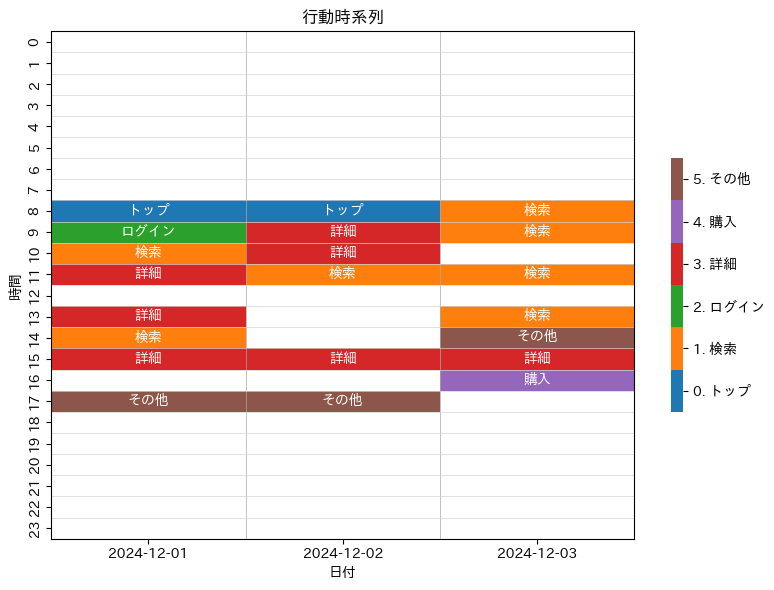

In [9]:
#@title 行動時系列を作成

fig, ax = plt.subplots(figsize=(8, 6))

n_categories = len(category_dict)

# ヒートマップ
sns.heatmap(pivoted_df["category_index"].astype(float),
            annot=pivoted_df["category"],
            fmt="",
            cmap=hex_colors[:n_categories],
            cbar_kws={'orientation': 'vertical',
                    "boundaries": np.linspace(-0.5, n_categories - 0.5, n_categories + 1),
                    'ticks': np.arange(n_categories),
                    'format': FixedFormatter([f"{i}. {v}" for i,v in enumerate(category_dict)]),
                    "shrink": 0.5}
            )

# 枠線の追加
for x in range(pivoted_df.shape[1]):
    plt.axvline(x, color='darkgray', linewidth=0.5)
for y in range(pivoted_df.shape[0]):
    plt.axhline(y, color='lightgray', linewidth=0.5)
ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.set_xlabel("日付")
ax.set_ylabel("時間")
ax.set_title("行動時系列")
plt.tight_layout()
plt.savefig("action_timeline.png", dpi=300)
plt.show()